In [2]:
import pandas as pd

# Load CSV files using the correct Kaggle path
train = pd.read_csv('/kaggle/input/walmart-sales-forecast/train.csv')
test = pd.read_csv('/kaggle/input/walmart-sales-forecast/test.csv')
features = pd.read_csv('/kaggle/input/walmart-sales-forecast/features.csv')
stores = pd.read_csv('/kaggle/input/walmart-sales-forecast/stores.csv')



In [3]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

print('First 5 rows in train\n',train.head())
print('\nFirst 5 rows in test\n',test.head())
print('\nFirst 5 rows in features\n',features.head())
print('\nFirst 5 rows in stores\n',stores.head())

First 5 rows in train
    Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

First 5 rows in test
    Store  Dept        Date  IsHoliday
0      1     1  2012-11-02      False
1      1     1  2012-11-09      False
2      1     1  2012-11-16      False
3      1     1  2012-11-23       True
4      1     1  2012-11-30      False

First 5 rows in features
    Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.5

In [4]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Merge train with features and stores
train_merged = pd.merge(train, features, on=['Store', 'Date'], how='left')
train_merged = pd.merge(train_merged, stores, on='Store', how='left')
print('\nFirst 5 rows in train\n', train_merged.head())

# Merge test with features and stores
test_merged = pd.merge(test, features, on=['Store', 'Date'], how='left')
test_merged = pd.merge(test_merged, stores, on='Store', how='left')
print('\nFirst 5 rows in test\n', test_merged.head())


First 5 rows in train
    Store  Dept        Date  Weekly_Sales  IsHoliday_x  Temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          CPI  Unemployment  IsHoliday_y Type    Size  
0  211.096358         8.106        False    A  151315  
1  211.242

In [5]:
# Drop IsHoliday_x and rename IsHoliday_y
train_merged.drop('IsHoliday_x', axis=1, inplace=True)
train_merged.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

# Now encode IsHoliday as integer (True → 1, False → 0)
train_merged['IsHoliday'] = train_merged['IsHoliday'].astype(int)

# Fix 'IsHoliday' as in train_merged
test_merged.drop('IsHoliday_x', axis=1, inplace=True)
test_merged.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

# Now encode IsHoliday as integer (True → 1, False → 0)
test_merged['IsHoliday'] = test_merged['IsHoliday'].astype(int)

print(train_merged.columns)
print(test_merged.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')


In [6]:
print(train_merged.columns)
print(test_merged.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size'],
      dtype='object')


In [7]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Handle missing values in train_merged
train_merged['Temperature'].fillna(train_merged['Temperature'].median(), inplace=True)
train_merged['Fuel_Price'].fillna(train_merged['Fuel_Price'].median(), inplace=True)
train_merged['CPI'].fillna(train_merged['CPI'].median(), inplace=True)
train_merged['Unemployment'].fillna(train_merged['Unemployment'].median(), inplace=True)

markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
train_merged[markdown_cols] = train_merged[markdown_cols].fillna(0)

# Check missing values
print("Missing values in train:\n", train_merged.isnull().sum())

Missing values in train:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64


In [8]:

# Convert 'Date' to datetime format
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

# Create time-based features
train_merged['Year'] = train_merged['Date'].dt.year
train_merged['Month'] = train_merged['Date'].dt.month
train_merged['Week'] = train_merged['Date'].dt.isocalendar().week.astype(int)
train_merged['Day'] = train_merged['Date'].dt.day
train_merged['DayOfWeek'] = train_merged['Date'].dt.dayofweek
train_merged['IsMonthStart'] = train_merged['Date'].dt.is_month_start.astype(int)
train_merged['IsMonthEnd'] = train_merged['Date'].dt.is_month_end.astype(int)

In [9]:
print("\nFinal Columns:\n", train_merged.columns)
print("\nAny Missing Values?:\n", train_merged.isnull().sum())


Final Columns:
 Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Day', 'DayOfWeek', 'IsMonthStart', 'IsMonthEnd'],
      dtype='object')

Any Missing Values?:
 Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
DayOfWeek       0
IsMonthStart    0
IsMonthEnd      0
dtype: int64


In [10]:
# Fill missing values (same columns as in train_merged)
for col in ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']:
    test_merged[col].fillna(train_merged[col].median(), inplace=True)

# Fill markdowns 
for col in ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']:
    test_merged[col].fillna(0, inplace=True)  # You can use 0 or median like train_merged

In [11]:
# Convert 'Date' to datetime format
test_merged['Date'] = pd.to_datetime(test_merged['Date'])

# Create time-based features
test_merged['Year'] = test_merged['Date'].dt.year
test_merged['Month'] = test_merged['Date'].dt.month
test_merged['Week'] =test_merged['Date'].dt.isocalendar().week.astype(int)
test_merged['Day'] = test_merged['Date'].dt.day
test_merged['DayOfWeek'] = test_merged['Date'].dt.dayofweek
test_merged['IsMonthStart'] = test_merged['Date'].dt.is_month_start.astype(int)
test_merged['IsMonthEnd'] = test_merged['Date'].dt.is_month_end.astype(int)

In [12]:
print("\nFinal Columns:\n", test_merged.columns)
print("\nAny Missing Values?:\n", test_merged.isnull().sum())


Final Columns:
 Index(['Store', 'Dept', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Day', 'DayOfWeek', 'IsMonthStart', 'IsMonthEnd'],
      dtype='object')

Any Missing Values?:
 Store           0
Dept            0
Date            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
Year            0
Month           0
Week            0
Day             0
DayOfWeek       0
IsMonthStart    0
IsMonthEnd      0
dtype: int64


In [13]:
import matplotlib.pyplot as plt
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


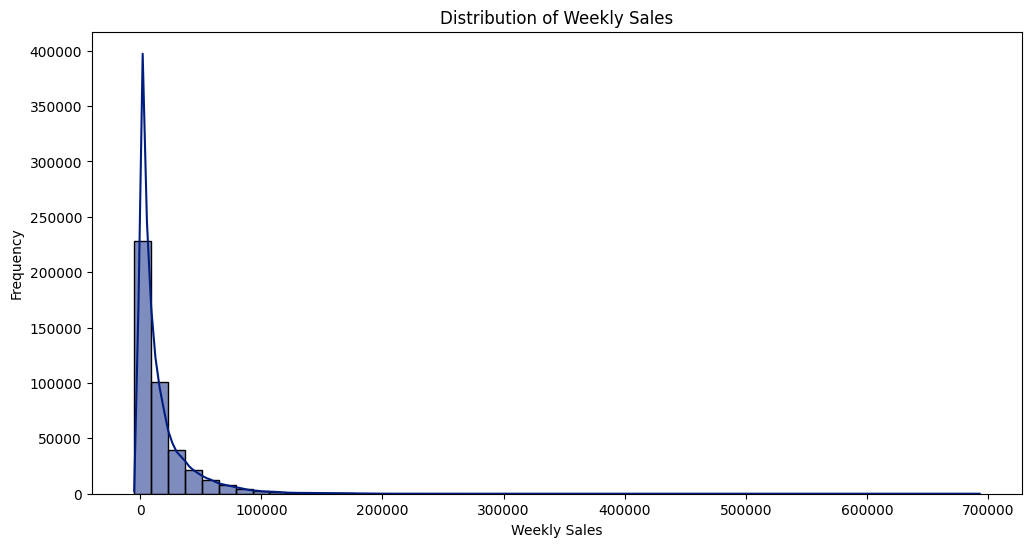

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots more readable
plt.style.use('seaborn-v0_8-dark-palette')
plt.rcParams['figure.figsize'] = (12, 6)

# 1. Overall sales distribution
sns.histplot(train_merged['Weekly_Sales'], bins=50, kde=True)
plt.title("Distribution of Weekly Sales")
plt.xlabel("Weekly Sales")
plt.ylabel("Frequency")
plt.show()


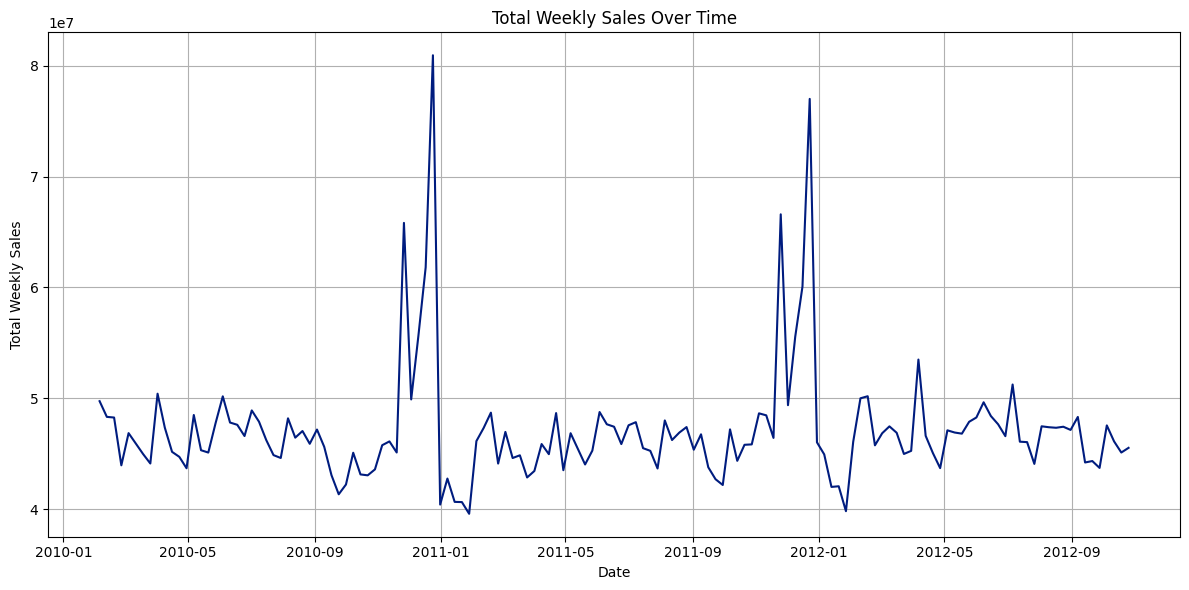

In [15]:
# 2. Sales over time (overall trend)
train_grouped_by_date = train_merged.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.style.use('seaborn-v0_8-dark-palette')

plt.plot(train_grouped_by_date['Date'], train_grouped_by_date['Weekly_Sales'])
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


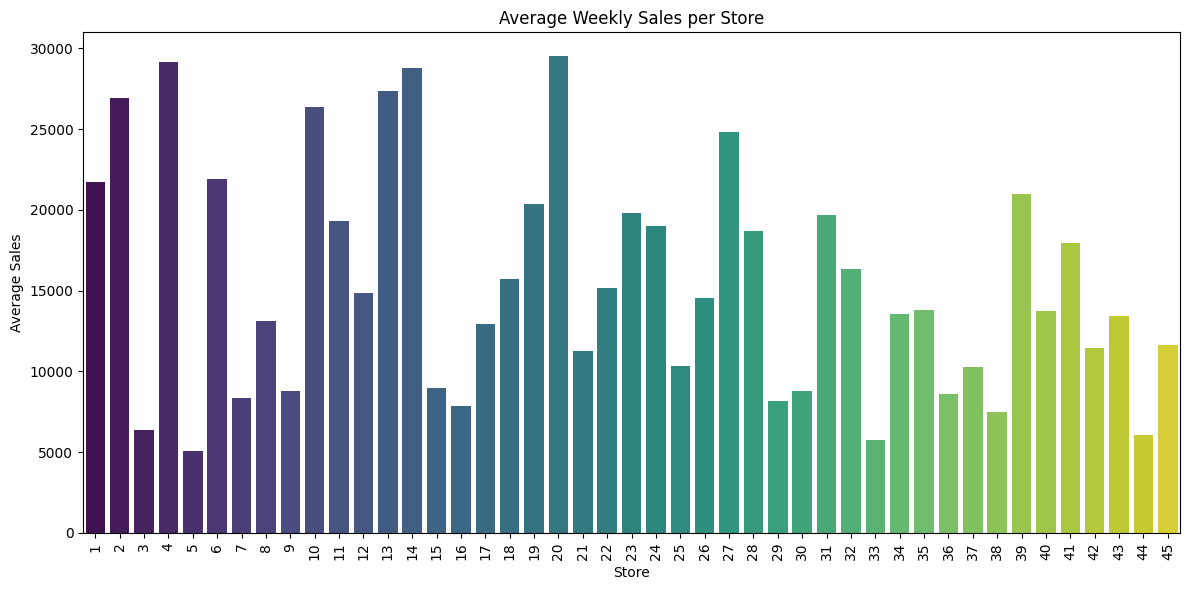

In [16]:
# 3. Average sales per store
store_sales = train_merged.groupby('Store')['Weekly_Sales'].mean().sort_values(ascending=False)

sns.barplot(x=store_sales.index, y=store_sales.values, palette="viridis")
plt.title("Average Weekly Sales per Store")
plt.xlabel("Store")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


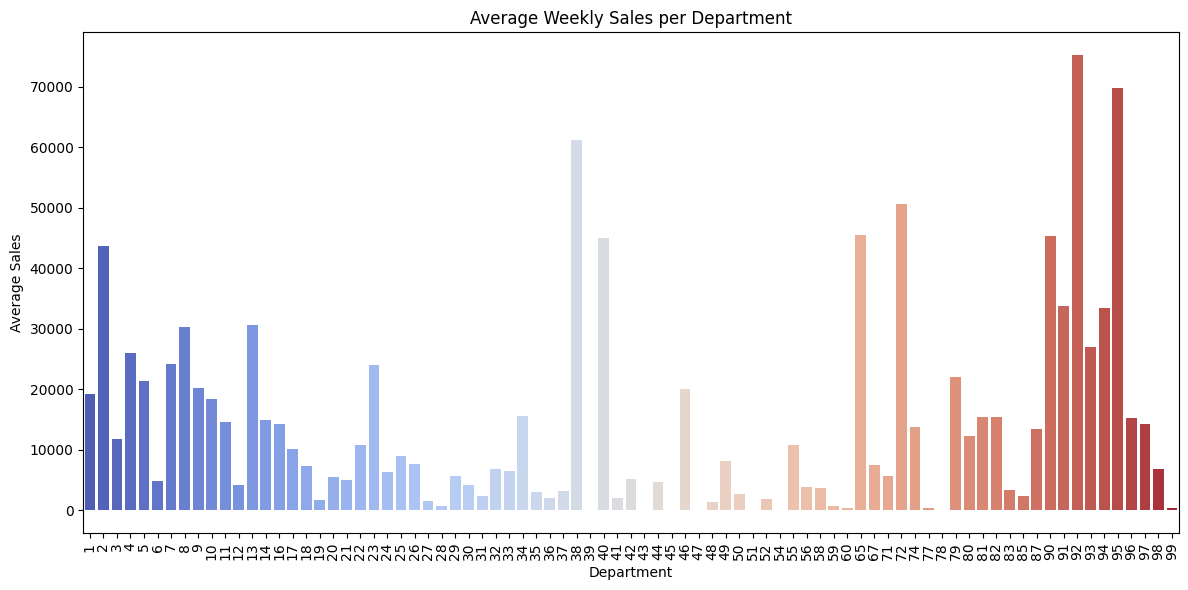

In [17]:
# 4. Sales by department
dept_sales = train_merged.groupby('Dept')['Weekly_Sales'].mean().sort_values(ascending=False)

sns.barplot(x=dept_sales.index, y=dept_sales.values, palette="coolwarm")
plt.title("Average Weekly Sales per Department")
plt.xlabel("Department")
plt.ylabel("Average Sales")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


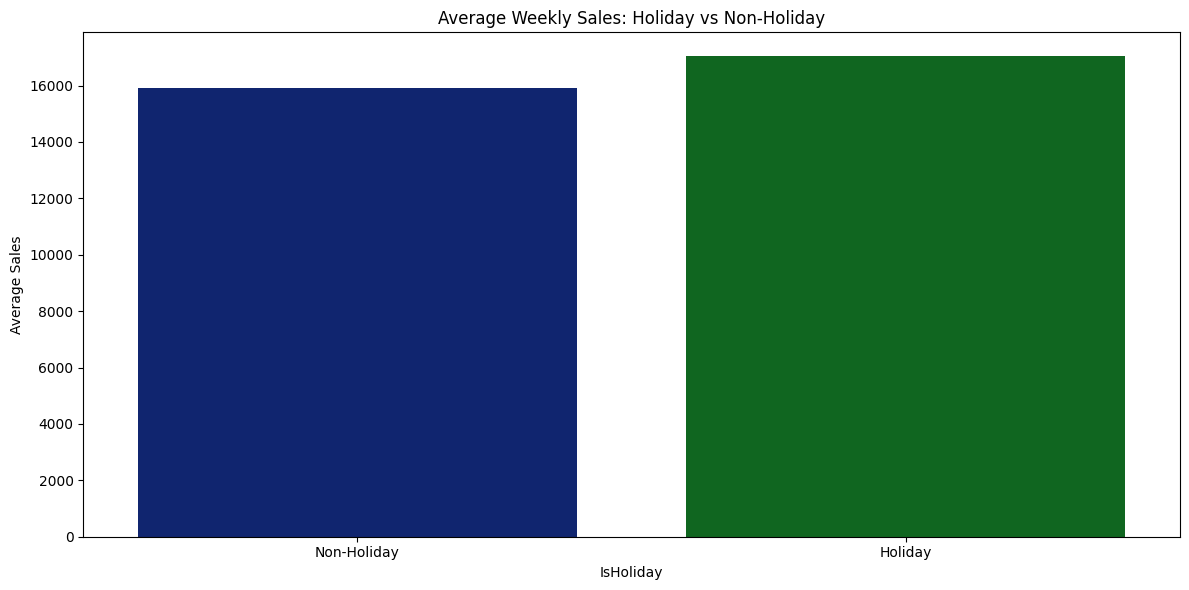

In [18]:
# 5. Holiday vs Non-Holiday Sales
holiday_sales = train_merged.groupby('IsHoliday')['Weekly_Sales'].mean()

sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.title("Average Weekly Sales: Holiday vs Non-Holiday")
plt.ylabel("Average Sales")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# Define features and target
features = ['Store', 'Dept', 'IsHoliday', 'Temperature', 'Fuel_Price', 'CPI',
            'Unemployment', 'Size', 'Year', 'Month', 'Week', 'Day',
            'DayOfWeek', 'IsMonthStart', 'IsMonthEnd']

X = train_merged[features]
y = train_merged['Weekly_Sales']

# Train-test split (we'll reserve part of the training data for validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on validation set
y_pred = lr.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Linear Regression Performance:\nMAE: {mae:.2f}\nRMSE: {rmse:.2f}")


Linear Regression Performance:
MAE: 14555.21
RMSE: 21811.64


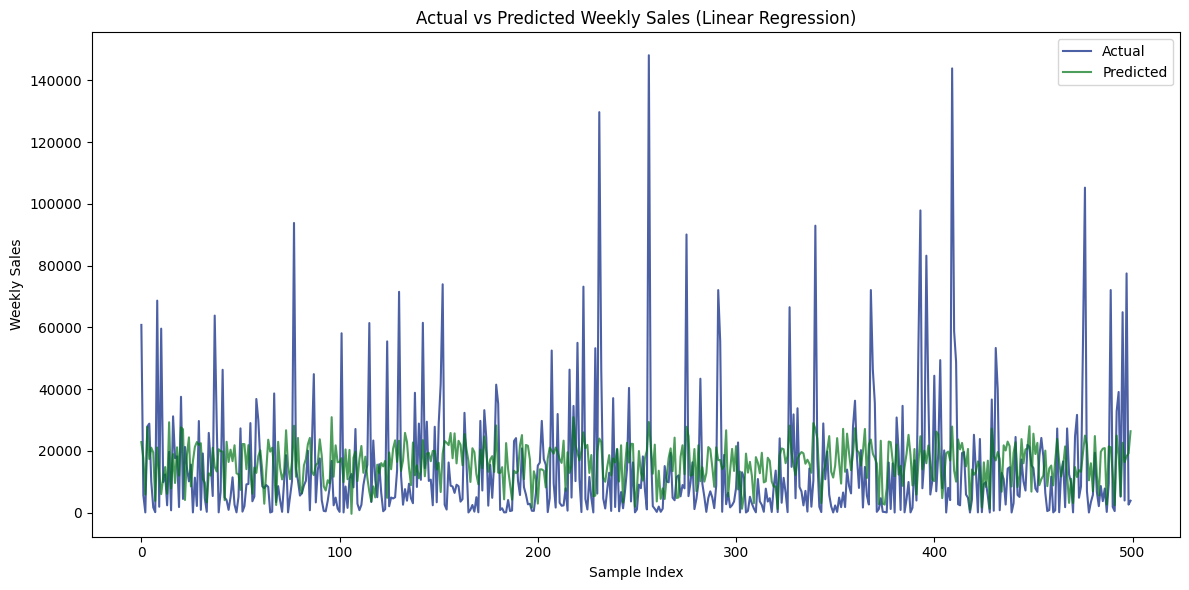

In [20]:
import matplotlib.pyplot as plt

# Randomly picks 500 unique indices from the validation set
sample_idx = np.random.choice(len(y_test), 500, replace=False)

plt.figure(figsize=(12, 6))
plt.plot(y_test.iloc[sample_idx].values, label='Actual', alpha=0.7)
plt.plot(y_pred[sample_idx], label='Predicted', alpha=0.7)
plt.legend()
plt.title("Actual vs Predicted Weekly Sales (Linear Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()


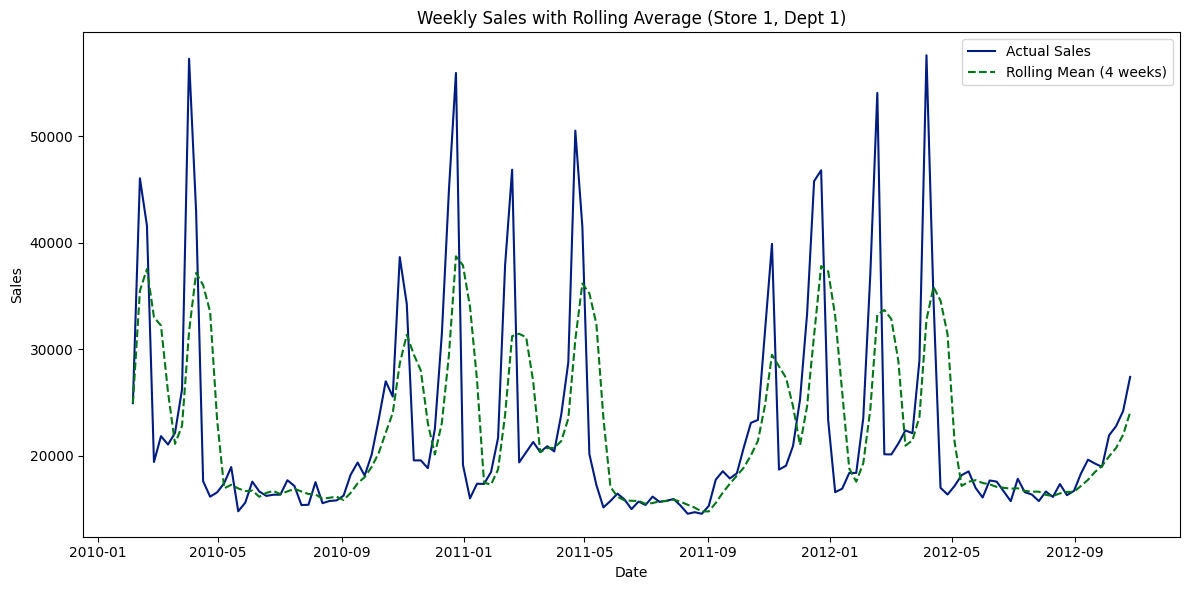

In [21]:
# Sort for consistency
train_merged.sort_values(by=['Store', 'Dept', 'Date'], inplace=True)

# Compute rolling average for each Store-Dept group
train_merged['Rolling_Mean_Weekly_Sales'] = train_merged.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

# Visualize rolling average for one Store-Dept pair
sample = train_merged[(train_merged['Store'] == 1) & (train_merged['Dept'] == 1)]

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(sample['Date'], sample['Weekly_Sales'], label='Actual Sales')
plt.plot(sample['Date'], sample['Rolling_Mean_Weekly_Sales'], label='Rolling Mean (4 weeks)', linestyle='--')
plt.title('Weekly Sales with Rolling Average (Store 1, Dept 1)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipykernel_36/706816182.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


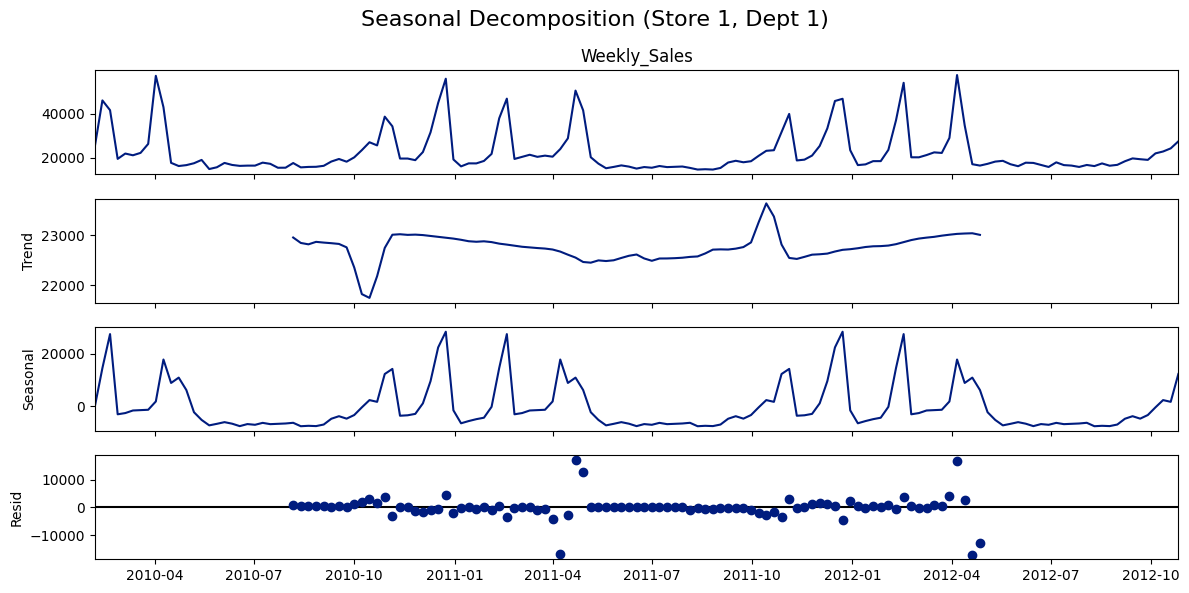

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set index as Date for decomposition
sample.set_index('Date', inplace=True)

# Apply decomposition on Weekly_Sales (frequency=52 weeks)
result = seasonal_decompose(sample['Weekly_Sales'], model='additive', period=52)

# Plot decomposition
result.plot()
plt.suptitle('Seasonal Decomposition (Store 1, Dept 1)', fontsize=16)
plt.tight_layout()
plt.show()

# Reset index if needed for further steps
sample.reset_index(inplace=True)


In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Make a working copy
train_encoded = train_merged.copy()

# Encode 'Type' (categorical variable)
le = LabelEncoder()
train_encoded['Type'] = le.fit_transform(train_encoded['Type'])

# Define the features and target
features = [
    'Store', 'Dept', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
    'IsHoliday', 'Type', 'Size', 'Year', 'Month', 'Week', 'DayOfWeek',
    'IsMonthStart', 'IsMonthEnd'
]

target = 'Weekly_Sales'


In [51]:
# Sort by date for time-aware split
train_sorted = train_encoded.sort_values("Date")

# Calculate 80% point
split_idx = int(len(train_sorted) * 0.8)
split_date = train_sorted.iloc[split_idx]['Date']
print("New split date:", split_date)

New split date: 2012-04-13 00:00:00


In [52]:
# Ensure 'Date' is in datetime format
train_sorted['Date'] = pd.to_datetime(train_sorted['Date'])

# Split by date
train_data = train_sorted[train_sorted['Date'] <= split_date]
val_data   = train_sorted[train_sorted['Date'] > split_date]


# Prepare training and validation sets
X_train = train_data[features]
y_train = train_data[target]

X_val = val_data[features]
y_val = val_data[target]


In [53]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)

# Predict on validation set
y_pred = xgb_model.predict(X_val)


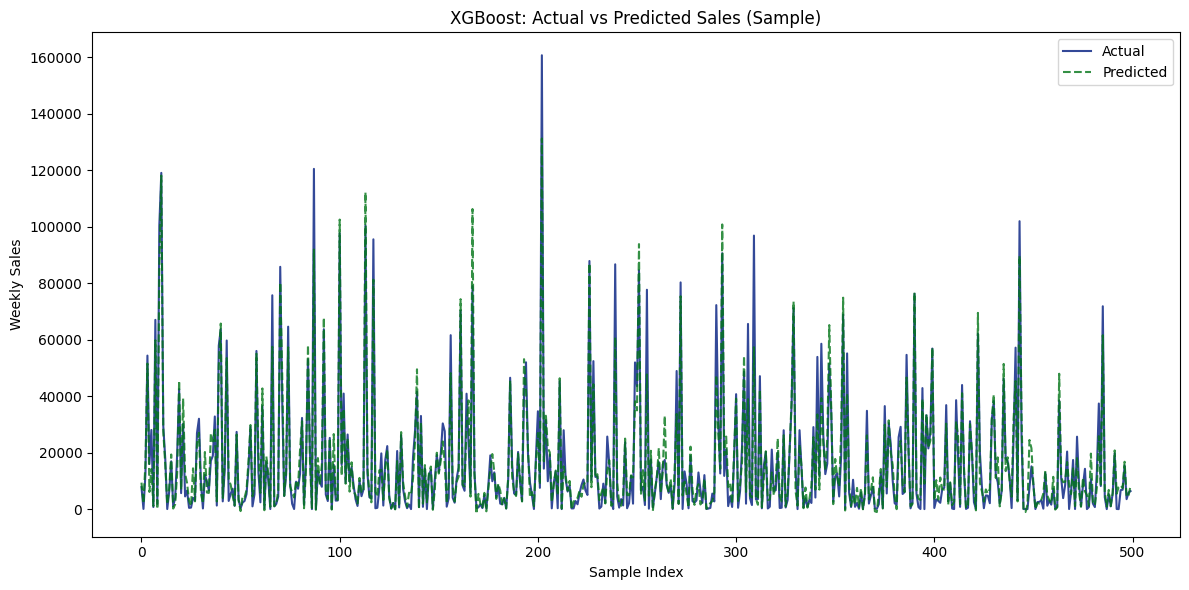

In [57]:
import matplotlib.pyplot as plt

# Avoid sampling from empty set
if len(y_val) > 500:
    sample_idx = np.random.choice(len(y_val), 500, replace=False)
else:
    sample_idx = np.arange(len(y_val))

plt.figure(figsize=(12, 6))
plt.plot(range(len(sample_idx)), y_val.iloc[sample_idx], label='Actual', alpha=0.8)
plt.plot(range(len(sample_idx)), y_pred[sample_idx], label='Predicted', linestyle='--', alpha=0.8)

plt.title("XGBoost: Actual vs Predicted Sales (Sample)")
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()


In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")


Validation MAE: 3880.39
Validation RMSE: 6412.38
